In [1]:
import numpy as np
import matplotlib.pyplot as plt

from slgep import C_SLGEP

In [2]:
def read_data_file():
    X = []
    y = []
    
    with open("../data/training_data.txt") as fp:
        examples, features_num = fp.readline().split("\t")
        for example in range(int(examples)):
            data = [float(n.strip()) for n in fp.readline().split("\t")]                
            X.append(data[:int(features_num)])
            y.append(data[-1])

    return np.array(X), np.array(y)

In [3]:
X, y = read_data_file()

In [4]:
X.shape, y.shape, X.size, y.size

((900, 2), (900,), 1800, 900)

In [5]:
X, y

(array([[0.597156 , 0.564379 ],
        [0.872707 , 0.584765 ],
        [0.236396 , 0.321604 ],
        ...,
        [0.866909 , 0.0678121],
        [0.265084 , 0.176824 ],
        [0.719535 , 0.39198  ]]),
 array([0.875457 , 1.1014   , 0.337446 , 0.614782 , 1.02884  , 0.936267 ,
        0.520288 , 0.627664 , 1.54103  , 0.0275238, 0.243502 , 1.07566  ,
        1.06251  , 0.629471 , 1.06452  , 0.787585 , 0.942757 , 0.891493 ,
        0.245037 , 0.244113 , 1.11147  , 0.796133 , 1.27143  , 1.23484  ,
        0.578182 , 0.354958 , 0.660755 , 0.792358 , 0.444726 , 1.22644  ,
        1.56521  , 1.07814  , 1.26788  , 1.13342  , 1.18582  , 0.807303 ,
        0.666121 , 0.153371 , 0.530045 , 0.0402185, 0.601768 , 1.04408  ,
        0.342284 , 0.197833 , 0.521468 , 0.698862 , 1.39909  , 0.353866 ,
        0.998245 , 1.5099   , 0.916207 , 0.614141 , 1.08777  , 1.13507  ,
        0.264953 , 1.32617  , 1.4502   , 0.733652 , 0.118538 , 1.00174  ,
        0.59675  , 0.306502 , 1.09824  , 0.839444 , 0

In [6]:
model = C_SLGEP(2)

In [7]:
model.set_dataset(X, y)

In [8]:
model.generate_random_population(50)

In [9]:
history = model.fit(100)

In [10]:
# Chromosome
print(model.best[0][0])

[    0     9     2     8     0     8     9 10000     3 10001 10000 10001
 10000 10001 10000 10000 10000 10000 10001 10000 10000     4 20000     5
 20000 20000 20001 20000 20000     2     1 20001 20001 20001 20000]


In [11]:
# Fitness
print(model.best[0][1])

0.01305177446775416


In [12]:
print("input:", X[0]), print("target:", y[0])
print("prediction:", model.predict(X[0], model.best[0][0]))

input: [0.597156 0.564379]
target: 0.875457
prediction: 0.8641743122692807


In [13]:
X[0][0] + (X[0][1] ** 2)

0.915679655641

In [14]:
predictions = []
for x in X:
    prediction = model.predict(x, model.best[0][0])
    predictions.append(prediction)

In [15]:
# Get mean fitness of each generation
mean_fitness_evolution = [fitness.mean() for fitness in history]
# Get best fitness of each generation
best_fitness_evolution = [fitness.min() for fitness in history]

In [16]:
history.shape

(100, 50)

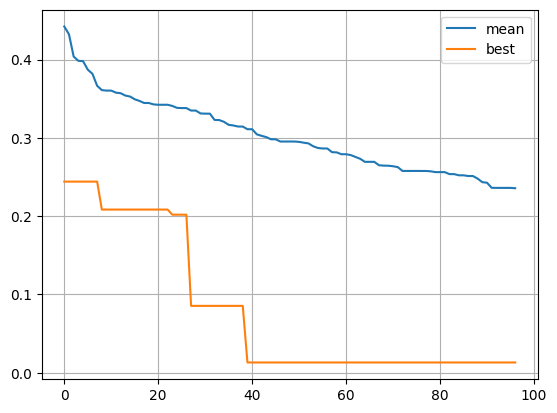

In [17]:
# Remove initial error because it is too large
cut = 3
n = range(len(best_fitness_evolution) - cut)

plt.plot(n, mean_fitness_evolution[cut:], label="mean")
plt.plot(n, best_fitness_evolution[cut:], label="best")

plt.legend()
plt.grid()

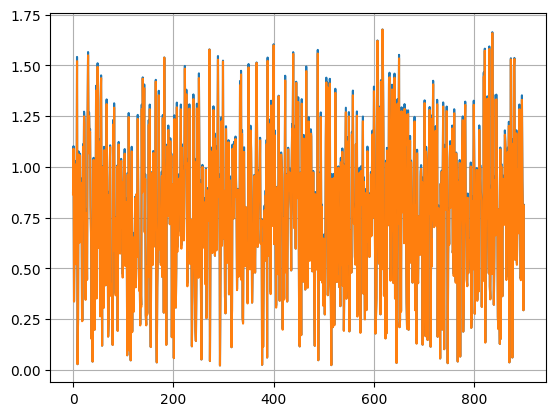

In [18]:
plt.plot(range(len(y)), y, predictions)
plt.grid()